<a href="https://colab.research.google.com/github/i-akash/Data-science/blob/master/practice/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np

In [0]:
def readDataset(filenames=[]):
  for filename in filenames:
    data=np.loadtxt('drive/My Drive/ds dataset/bangla_digit_dataset/'+filename)
    yield data

data=readDataset(['test_images.txt','train_images.txt','test_labels.txt','train_labels.txt'])


<generator object readDataset at 0x7fc073fed2b0>


In [0]:
X_train=next(data)
X_test=next(data)
y_train=next(data)
y_test=next(data)


In [0]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',max_iter=20,verbose=True)
svc.fit(X_train,y_train)

[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=20, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [0]:
y_predict=svc.predict(X_test)

In [0]:
import pandas as pd
comp_df=pd.DataFrame({'actual':y_test,'predict':y_predict})
comp_df

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix 

In [0]:
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)

0.8725235057085292


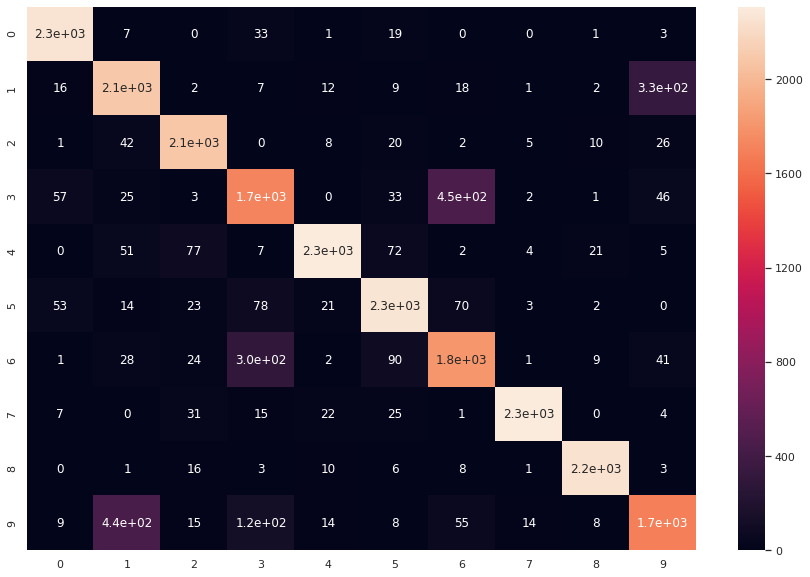

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.color_palette('hls')
sns.heatmap(cm,annot=True)

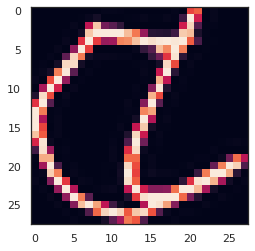

In [0]:
# suppose new observation
index=30
testImage=X_test[index]
plt.imshow(testImage.reshape(28,28))

In [0]:
print("actual value: ",y_test[index])
print("predicted value: ",svc.predict([testImage]))

actual value:  5.0
predicted value:  [5.]
